In [135]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import roc_curve, roc_auc_score, matthews_corrcoef, confusion_matrix

[]

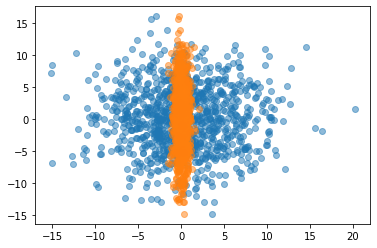

In [21]:
X = 5*rd.normal(size=(1000,2))
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.plot()

X2 = np.copy(X)
X2[:,0] = X[:,0] * 0.1
plt.scatter(X2[:,0], X2[:,1], alpha=0.5)
plt.plot()

[]

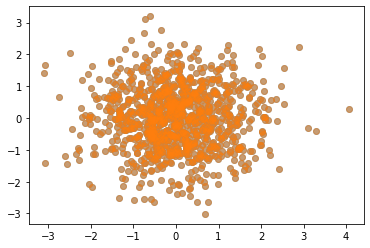

In [22]:
scaler1 = StandardScaler()

Xs = scaler1.fit_transform(X)
plt.scatter(Xs[:,0], Xs[:,1], alpha=0.5)
plt.plot()


scaler2 = StandardScaler()

Xs2 = scaler2.fit_transform(X2)
plt.scatter(Xs2[:,0], Xs2[:,1], alpha=0.5)
plt.plot()

# same thing

[]

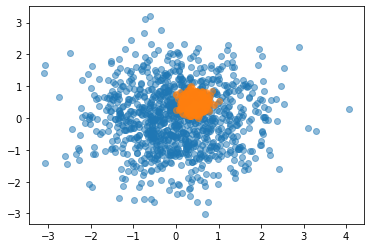

In [23]:
mmscaler = MinMaxScaler()

Xs3 = mmscaler.fit_transform(X2)
plt.scatter(Xs2[:,0], Xs2[:,1], alpha=0.5)
plt.scatter(Xs3[:,0], Xs3[:,1], alpha=0.5)
plt.plot()

## tests SVC predict proba

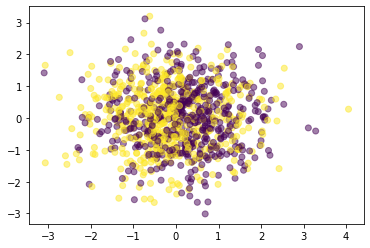

In [85]:
Y = [Xs2[i,0] <= 0 for i in range(1000)]


# /!\ en fait c'est pas le nombre que tu mets parce que la sélection des indices est avec remise
n_noise = 600
digits_to_change = rd.randint(0,1000, size=n_noise)
noised_Y = np.copy(Y)
for i in digits_to_change:
    noised_Y[i] = 1 - noised_Y[i]


plt.scatter(Xs2[:,0], Xs2[:,1], alpha=0.5, c=noised_Y)

In [92]:
model = SVC(kernel='linear', probability=True)

Y_proba = cross_val_predict(model, Xs2, noised_Y, cv=5, method='predict_proba')

Y_proba

array([[0.53589906, 0.46410094],
       [0.41723089, 0.58276911],
       [0.41403161, 0.58596839],
       ...,
       [0.57110446, 0.42889554],
       [0.39369079, 0.60630921],
       [0.46565994, 0.53434006]])

In [93]:
Y_pred = np.argmax(Y_proba, axis=1)
Y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,

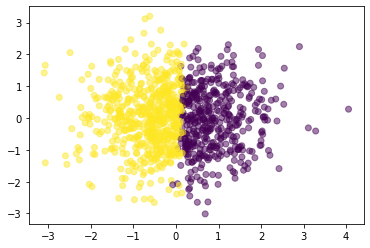

In [107]:
plt.scatter(Xs2[:,0], Xs2[:,1], alpha=0.5, c=Y_pred)

In [88]:
acc = np.sum([Y[i] == Y_pred[i] for i in range(1000)])
acc

943

0.9973081803299031


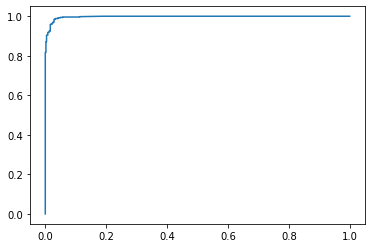

In [95]:
auc = roc_auc_score(Y, Y_proba[:,1])
print(auc)

curves = roc_curve(Y, Y_proba[:,1])

plt.plot(curves[0], curves[1])

### Another test

[[-0.48052094  1.41965715]
 [ 1.53115312 -0.45679696]
 [ 1.31970693 -0.21134711]
 ...
 [ 1.39140981 -0.76945089]
 [-1.84866943  0.91531429]
 [ 0.22799691  0.25310791]]


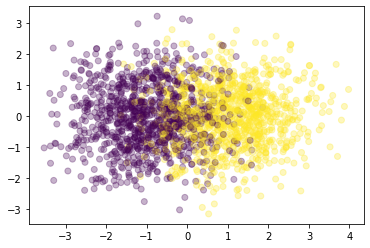

In [106]:
X = np.concatenate([rd.normal((-1,0),1,(1000,2)), rd.normal((1,0),1,(1000,2))])

Y = np.concatenate([np.zeros(1000,), np.ones(1000,)])

X,Y = shuffle(X, Y)

plt.scatter(X[:,0], X[:,1], c=Y, alpha=0.3)

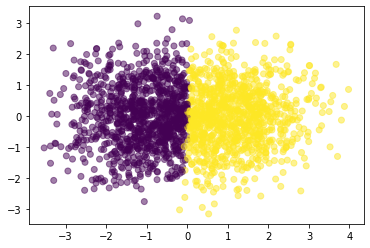

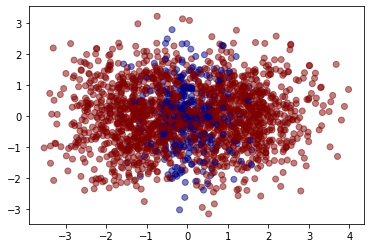

In [117]:
model = SVC(kernel='linear', probability=True)

Y_proba = cross_val_predict(model, X, Y, cv=5, method='predict_proba')

Y_pred = np.argmax(Y_proba, axis=1)

plt.scatter(X[:,0], X[:,1], alpha=0.5, c=Y_pred)

plt.show()

plt.scatter(X[:,0], X[:,1], alpha=0.5, c=(Y_pred==Y), cmap='jet')

0.928236
0.6741631672320948


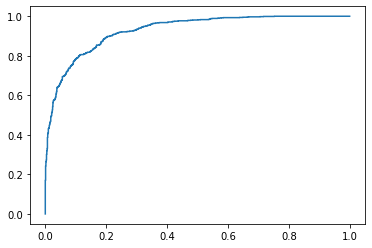

In [119]:
auc = roc_auc_score(Y, Y_proba[:,1])
print(auc)

curves = roc_curve(Y, Y_proba[:,1])

plt.plot(curves[0], curves[1])

mcc = matthews_corrcoef(Y, Y_pred)
print(mcc)

### Moulti class

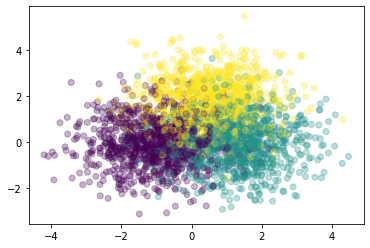

In [123]:
X = np.concatenate([rd.normal((-1,0),1,(1000,2)), rd.normal((1.3,0),1,(1000,2)), rd.normal((0.5,1.8),1,(1000,2))])

Y = np.concatenate([np.zeros(1000,), np.ones(1000,), np.ones(1000,)*2])

X,Y = shuffle(X, Y)

plt.scatter(X[:,0], X[:,1], c=Y, alpha=0.3)

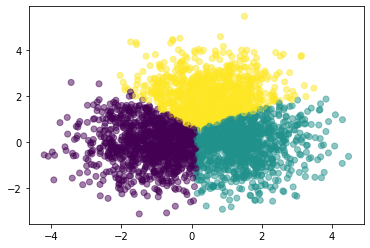

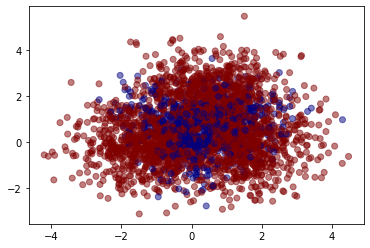

In [124]:
model = SVC(kernel='linear', probability=True)

Y_proba = cross_val_predict(model, X, Y, cv=5, method='predict_proba')

Y_pred = np.argmax(Y_proba, axis=1)

plt.scatter(X[:,0], X[:,1], alpha=0.5, c=Y_pred)

plt.show()

plt.scatter(X[:,0], X[:,1], alpha=0.5, c=(Y_pred==Y), cmap='jet')

<AxesSubplot:>

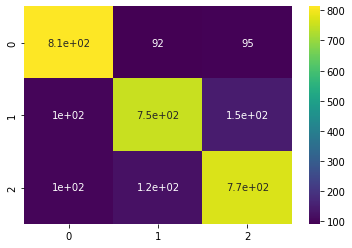

In [137]:
mat = confusion_matrix(Y, Y_pred)
sns.heatmap(mat, annot=True, cmap='viridis')

In [132]:
moulti_auc = roc_auc_score(Y, Y_proba, average="weighted", multi_class="ovr")
print(moulti_auc)

mcc = matthews_corrcoef(Y, Y_pred)
print(mcc)

0.918061
0.6690860946166174
